# Variational Quantum Eigenvalue (VQE)
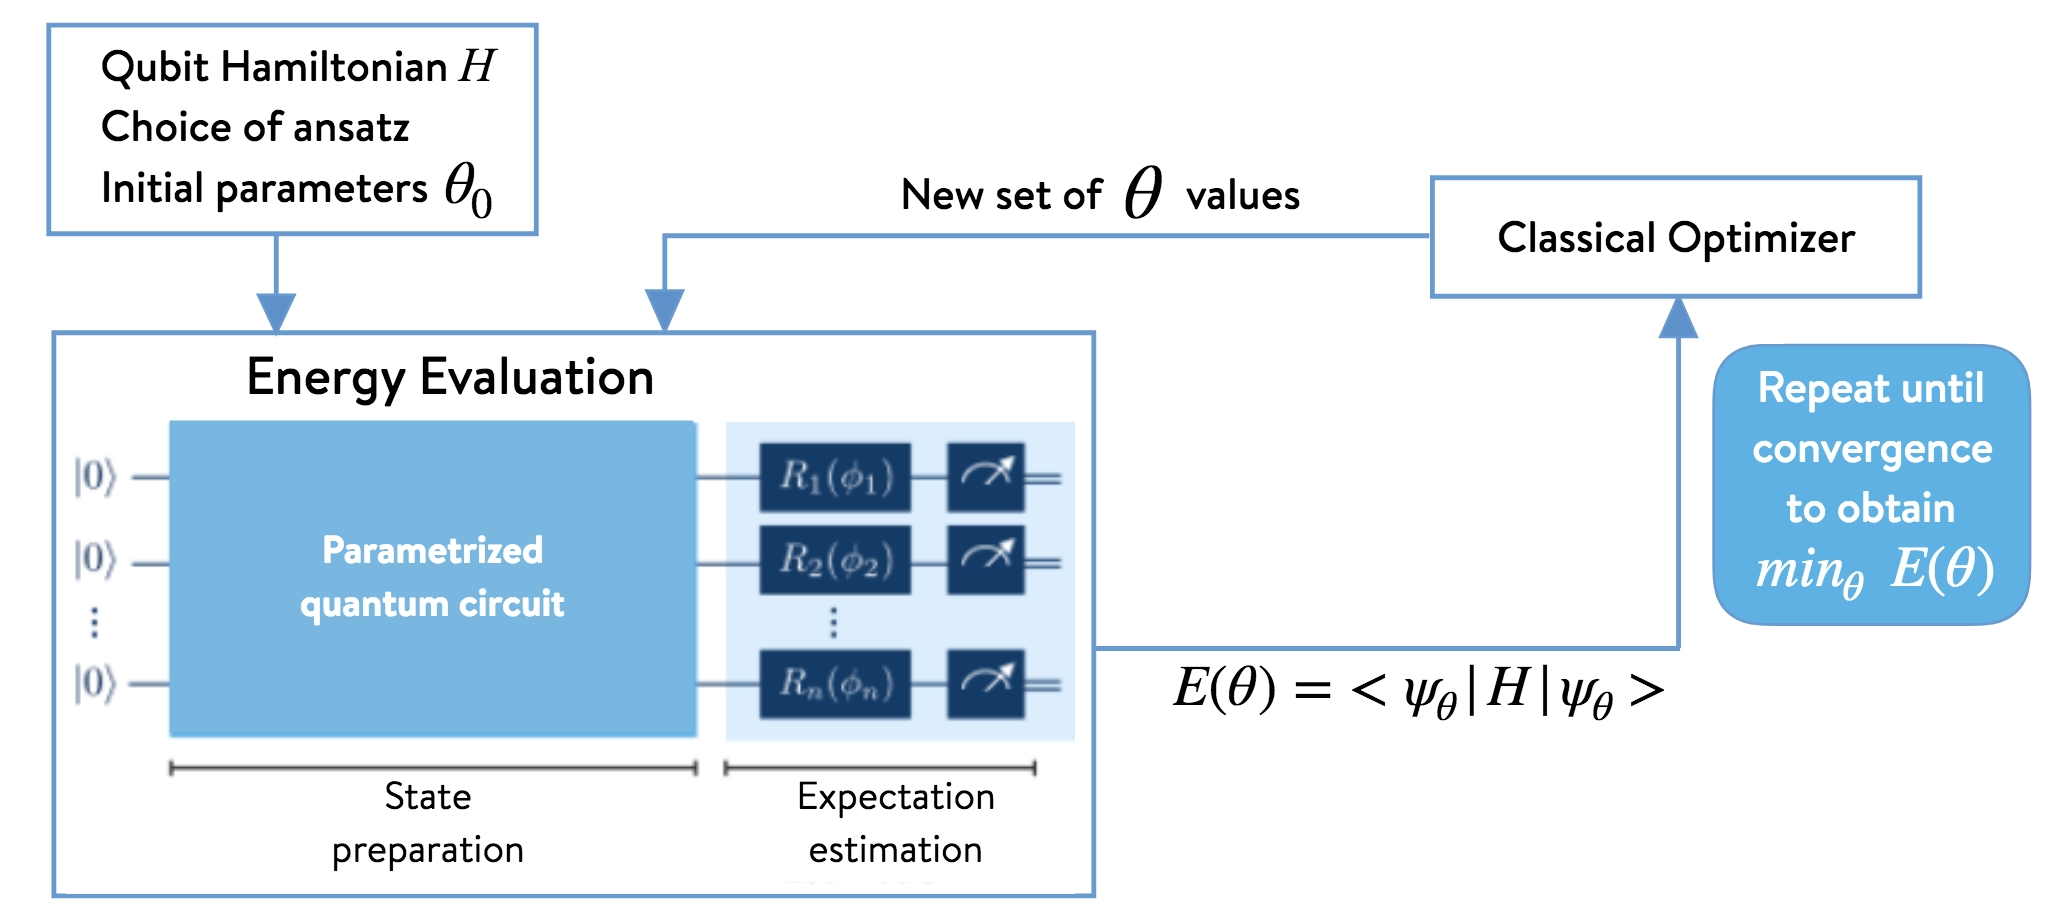

# Logic Flow
## 1) Preparing State
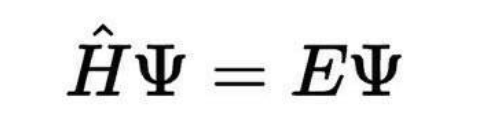

- The goal of VQE is to find the minimum eigenvalue $E$ (ideally the ground-state energy) of a given molecular or physical Hamiltonian $\hat{H}$:
$$\hat{H} |\Psi\rangle = E |\Psi\rangle$$
- The Hamiltonian $\hat{H}$ is fixed and predefined.
- We do not know the exact ground-state wavefunction $|\Psi\rangle$, so we approximate it using a parameterized trial wavefunction called the ansatz.

###Ansatz
- The ansatz is a parameterized quantum circuit $U(\boldsymbol{\theta})$, producing trial states of the form:
$$|\Psi(\boldsymbol{\theta})\rangle = U(\boldsymbol{\theta})\, |0\rangle^{\otimes n}$$
where $\boldsymbol{\theta} = (\theta_1, \theta_2, \dots, \theta_m)$ are trainable real-valued parameters (typically rotation angles of single-qubit gates), and $|0\rangle^{\otimes n}$ is the initial reference state (usually the Hartree–Fock state or all-zeros computational basis state).
- $U(\boldsymbol{\theta})$ consists of a fixed sequence of parameterized single- and/or multi-qubit gates (e.g., RY, RZ, CNOT, etc.), often arranged in repeating layers to increase expressiveness.
- Example of $U(\boldsymbol{\theta})$ (Ansatz):
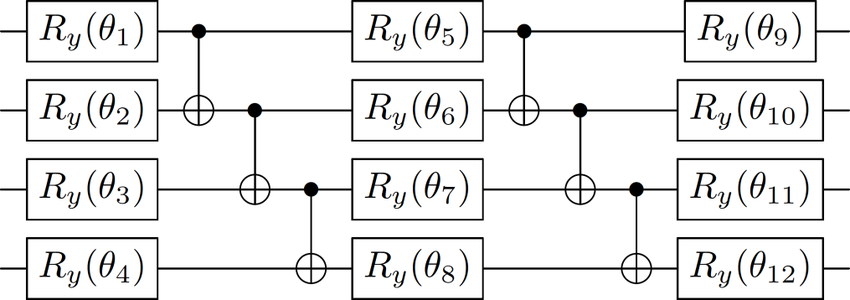

- Starting from the initial qubits in $|0\rangle$, the circuit $U(\boldsymbol{\theta})$ is applied to construct the trial quantum state $|\Psi(\boldsymbol{\theta})\rangle$.



## 2)Measure
- For the current trial state $|\Psi(\boldsymbol{\theta})\rangle$, compute the expectation value of the Hamiltonian:
$$E(\boldsymbol{\theta}) = \langle \Psi(\boldsymbol{\theta}) | \hat{H} | \Psi(\boldsymbol{\theta}) \rangle$$


## 3)Classical Optimizer
- Send the measured energy $E(\boldsymbol{\theta})$ (and optionally its gradient) to a classical optimizer, such as SPSA, COBYLA, L-BFGS-B, Adam, or gradient descent.
- The optimizer analyzes the energy landscape and determines the direction and step size for updating the variational parameters $\boldsymbol{\theta}$ to reduce $E(\boldsymbol{\theta})$.


## 4)Update Parameters
- Replace the current parameters with new values:
$$\boldsymbol{\theta}^{(k+1)} \leftarrow \boldsymbol{\theta}^{(k)} + \Delta\boldsymbol{\theta}$$
- where $\Delta\boldsymbol{\theta}$ is proposed by the classical optimizer.
These updated parameters are sent back to the quantum processor for the next iteration.


##5)Repeat
Return to step 1: apply the updated circuit $U(\boldsymbol{\theta}^{(k+1)})$ to prepare a new trial state.
Repeat steps 1–4 iteratively until one or more convergence criteria are met, such as:
- Energy change between iterations falls below a threshold
- Gradient norm becomes sufficiently small
- Maximum number of iterations or circuit evaluations is reached


---
# 📚 Case Study: Finding Ground State Energy of Hydrogen Molecule (H₂)

## Why H₂?

We're studying H₂ because it's the **simplest neutral molecule**:
- Only 2 protons and 2 electrons
- Small enough to simulate exactly on classical computers (for verification)
- Complex enough to demonstrate quantum advantage concepts
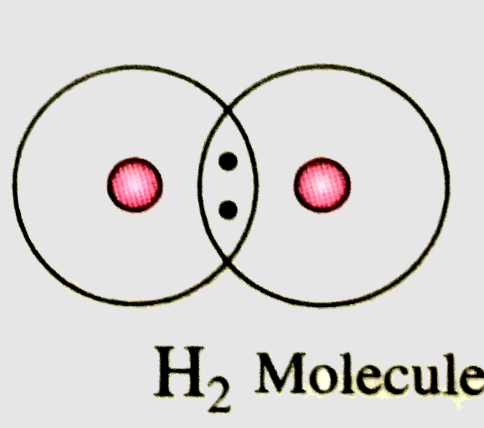
---
##  Why Do We Need Qubits?

To simulate a molecule on a quantum computer, we need to represent electron positions (orbitals) using qubits.

A qubit can represent:
- **0** → orbital empty (no electron)
- **1** → orbital occupied (electron present)

| Qubit State | Meaning |
|-------------|---------|
| \|0⟩ | No electron in this orbital |
| \|1⟩ | Electron occupies this orbital |

> 💡 This is the **Jordan-Wigner mapping**: each spin-orbital becomes one qubit!
---
## 🧮 Why We Start With 4 Qubits

### Step 1: Spatial Orbitals

Each hydrogen atom has one **1s orbital**, so H₂ has:
- **2 spatial orbitals** (left atom, right atom)
- 1s orbital can contain 2 electrons, but the electron is not the "same"

1s orbital is the sphere region where electron is likely to found, and with maximum 2 electrons exist inside it

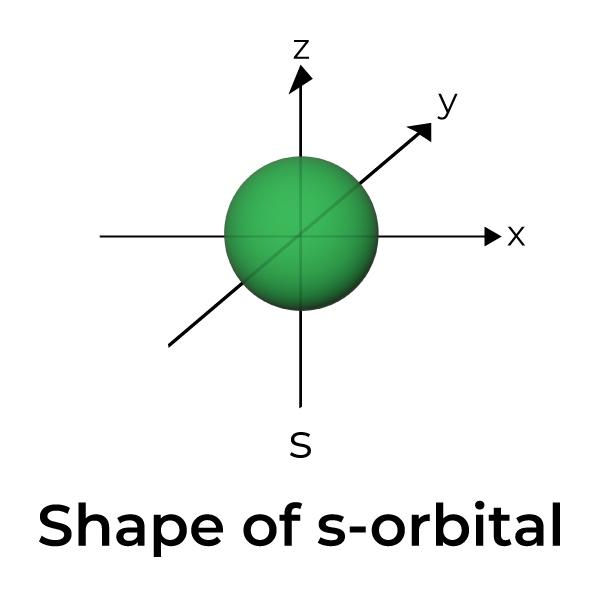

---

### Step 2: Add Spin

1s orbital contain 2 "not same" electron, which is differentiated by a property called spin

Electrons have **spin** ! ! :
- Spin ↑ (spin up)
- Spin ↓ (spin down)


---

### Step 3: Combine → Spin-Orbitals

**Spatial orbital + Spin = Spin-orbital**

| Spatial Orbital | Spin | Together = Spin-Orbital |
|-----------------|------|-------------------------|
| Left atom (1s)  | ↑    | Spin-orbital 1          |
| Left atom (1s)  | ↓    | Spin-orbital 2          |
| Right atom (1s) | ↑    | Spin-orbital 3          |
| Right atom (1s) | ↓    | Spin-orbital 4          |


---

### Step 4: Map to Qubits

$$\boxed{\text{1 spin-orbital} = \text{1 qubit}}$$

$$\text{4 spin-orbitals} \rightarrow \text{4 qubits}$$

| Qubit | Represents | \|0⟩ = Empty | \|1⟩ = Occupied |
|-------|------------|--------------|-----------------|
| q₀    | Spin-orbital 1 (Left, ↑)  | No e⁻ | Has e⁻ |
| q₁    | Spin-orbital 2 (Left, ↓)  | No e⁻ | Has e⁻ |
| q₂    | Spin-orbital 3 (Right, ↑) | No e⁻ | Has e⁻ |
| q₃    | Spin-orbital 4 (Right, ↓) | No e⁻ | Has e⁻ |
##  Why Do We Need 4 Qubits for H₂?

### The Journey: Molecule → Qubits
```
H₂ molecule → 2 spatial orbitals → 4 spin-orbitals → 4 qubits → 2 qubits (after symmetry)
```

---



## Why 2 Qubits used in final computation?

Original representation:

- STO-3G basis gives 2 spatial orbitals (one 1s on each H atom)  
- Each spatial orbital can hold ↑ or ↓ electron → 4 spin-orbitals  
- 4 spin-orbitals → 4 qubits (Jordan-Wigner mapping)

| Before reduction | After reduction |
|:-----------------|:----------------|
| 4 spin-orbitals | 2 spatial orbitals only |
| 4 qubits | 2 qubits |
| 2 electrons | Exactly 2 electrons (particle number conserved) |
| Unknown spin | Total spin Ŝ_z = 0 conserved (singlet state: one ↑ and one ↓) |

**Symmetry reduction** exploits the fact that:
1. Total electron number is conserved (always 2)
2. Total spin is conserved

This reduces our problem from 4 qubits to just **2 qubits**! As we only care for where this two electrons exist, and no more care about their number of spin orbital.
Physical meaning of the final 2 qubits
Each qubit now represents one spatial orbital (which is "1s", not spin-orbital):

| 2-qubit state | Meaning |
|---------------|---------|
| `01` | Both electrons on right atom **H⁺H⁻**|
| `10` | Both electrons on left atom **H⁻H⁺**|
| `11` | One electron on each atom (the normal covalent bond) |



- The ground-state wavefunction is a superposition  
|ψ⟩ = a│01⟩ + b│10⟩ + c│11⟩  
- where |c|² ≈ 90–95 % (covalent) and |a|² + |b|² ≈ 5–10 % (ionic) at equilibrium.

---
# Molecular Hamiltonian Preparation for VQE

## Overview

The molecular Hamiltonian describes the total energy of a quantum system and consists of:

$$\hat{H}_{\text{total}} = \hat{H}_{\text{electronic}} + \hat{H}_{\text{nuclear}}$$

This tutorial covers how to transform the molecular Hamiltonian from first quantization (position-based) to second quantization (occupation-based) for quantum computing applications.

---

## First Quantization: Molecular Hamiltonian

-First quantization treats particles as primary objects and waves as their properties

The electronic Hamiltonian in first quantization is:

$$\hat{H} = -\sum_{i=1}^{N} \frac{\nabla_i^2}{2} - \sum_{i=1}^{N}\sum_{A=1}^{M} \frac{Z_A}{r_{iA}} + \sum_{i=1}^{N}\sum_{j>i}^{N} \frac{1}{r_{ij}} + \sum_{A=1}^{M}\sum_{B>A}^{M} \frac{Z_A Z_B}{R_{AB}}$$

Where:
- **Kinetic energy term**: $-\sum_{i=1}^{N} \frac{\nabla_i^2}{2}$ - kinetic energy of electrons
- **Electron-nucleus attraction**: $-\sum_{i=1}^{N}\sum_{A=1}^{M} \frac{Z_A}{r_{iA}}$ - Coulomb attraction between electrons and nuclei
- **Electron-electron repulsion**: $\sum_{i=1}^{N}\sum_{j>i}^{N} \frac{1}{r_{ij}}$ - Coulomb repulsion between electrons
- **Nuclear-nuclear repulsion**: $\sum_{A=1}^{M}\sum_{B>A}^{M} \frac{Z_A Z_B}{R_{AB}}$ - constant term (nuclear repulsion energy)

### Notation:
- $N$ = number of electrons
- $M$ = number of nuclei
- $Z_A$ = atomic charge of nucleus $A$
- $r_{iA}$ = distance between electron $i$ and nucleus $A$
- $r_{ij}$ = distance between electrons $i$ and $j$
- $R_{AB}$ = distance between nuclei $A$ and $B$
- $\nabla_i^2$ = Laplacian operator: $\nabla_i^2 = \frac{\partial^2}{\partial x_i^2} + \frac{\partial^2}{\partial y_i^2} + \frac{\partial^2}{\partial z_i^2}$

### The Scaling Problem

**Issue**: The wavefunction size grows exponentially with $N$

For antisymmetry:
$$\Psi(\ldots, r_i, \ldots, r_j, \ldots) = -\Psi(\ldots, r_j, \ldots, r_i, \ldots)$$

**Solution**: Instead of tracking *where* each electron is, we track *which orbitals are occupied* (second quantization)

---

## Second Quantization

### Key Concept

Second quantization treats quantum fields as primary objects and particles as their excitations, automatically enforcing particle statistics and allowing variable particle number.
- **First Quantization**: "Electron $i$ is at position $r_i$"
- **Second Quantization**: "Orbital $\psi_\alpha$ has 1 electron"

### Background: Creation and Annihilation Operators

| Operator | Symbol | Action | Example |
|----------|--------|--------|---------|
| **Creation** | $\hat{a}_i^\dagger$ | Add electron to orbital $i$ | $\|000\rangle \rightarrow \hat{a}_2^\dagger \rightarrow \|010\rangle$ |
| **Annihilation** | $\hat{a}_i$ | Remove electron from orbital $i$ | $\|001\rangle \rightarrow \hat{a}_3 \rightarrow \|000\rangle$ |
| **Number counting** | $\hat{n}_i = \hat{a}_i^\dagger \hat{a}_i$ | Count electrons in orbital $i$ | |

### Important Properties

**Orbital**: One specific spin orbital, $\neq$ a spatial orbital

For electrons (fermions), we must satisfy the Pauli Exclusion Principle:

$$n_i \in \{0, 1\} \quad \text{(Pauli Exclusion)}$$

**Anticommutation relations (Fermions)**:

$$\{\hat{a}_i, \hat{a}_j^\dagger\} = \hat{a}_i \hat{a}_j^\dagger + \hat{a}_j^\dagger \hat{a}_i = \delta_{ij}$$

$$\{\hat{a}_i, \hat{a}_j\} = 0$$

$$\{\hat{a}_i^\dagger, \hat{a}_j^\dagger\} = 0$$

---

## Deriving the Second-Quantized Hamiltonian

### Step 1: First-Quantized Hamiltonian

$$\hat{H} = \sum_{i=1}^{N} \hat{h}(i) + \sum_{i,j>i}^{N} \hat{g}(i,j) + V_{NN}$$

Where:
- $\hat{h}(i)$ = one-electron operator (kinetic + electron-nucleus attraction)
- $\hat{g}(i,j)$ = two-electron operator (electron-electron repulsion)
- $V_{NN}$ = nuclear-nuclear repulsion (constant)

$$\hat{h}(i) = -\frac{\nabla_i^2}{2} - \sum_{A} \frac{Z_A}{r_{iA}}$$

$$\hat{g}(i,j) = \frac{1}{r_{ij}}$$

---

### Step 2: Choose Orbital Basis

We need to express quantum states using an **orbital basis** - a specific set of spin orbitals.

Let $\alpha = (r, \sigma)$ where:
- $r$ = position
- $\sigma$ = spin

**Single particle wavefunction**:
$$\psi(x) = \sum_{p} \chi_p(x) \hat{a}_p$$
- $\chi_p(x)$ removes a particle at position $x$

$$\psi^\dagger(x) = \sum_{p} \chi_p^*(x) \hat{a}_p^\dagger$$
- Creates a particle at position $x$

> Together, $\psi(x)$ and $\psi^\dagger(x)$ are **field operators** that destroy/create particles in continuous space.

---

### Step 3: Transform Each Term

#### i) One-electron term:

$$\sum_{i} \hat{h}(i) \rightarrow \sum_{p,q} h_{pq} \hat{a}_p^\dagger \hat{a}_q$$

**Derivation**:

$$\sum_{i} \hat{h}(i) = \int \psi^\dagger(x) \hat{h}(x) \psi(x) \, dx$$

$$= \int \left(\sum_{p} \chi_p^*(x)\right) \hat{h} \left(\sum_{q} \chi_q(x)\right) dx$$

$$= \sum_{p,q} \hat{a}_p^\dagger \hat{a}_q \int \chi_p^*(x) \hat{h} \chi_q(x) \, dx$$

$$= \sum_{p,q} h_{pq} \hat{a}_p^\dagger \hat{a}_q$$

Where:
$$h_{pq} = \int \chi_p^*(x) \hat{h} \chi_q(x) \, dx$$

---

#### ii) Two-electron term (similar derivation):

$$\sum_{i,j} \hat{g}(i,j) \rightarrow \frac{1}{2} \sum_{p,q,r,s} h_{pqrs} \hat{a}_p^\dagger \hat{a}_q^\dagger \hat{a}_r \hat{a}_s$$

---

### Final Second-Quantized Hamiltonian

$$\boxed{\hat{H} = \sum_{p,q} h_{pq} \hat{a}_p^\dagger \hat{a}_q + \frac{1}{2} \sum_{p,q,r,s} h_{pqrs} \hat{a}_p^\dagger \hat{a}_q^\dagger \hat{a}_r \hat{a}_s + V_{NN}}$$

This is the form we use for quantum computing!

---

## Example: H₂ Molecule (2 qubits)

### One-term electron operator

$$\hat{h}(i) = \sum_{p,q} h_{pq} \hat{a}_p^\dagger \hat{a}_q$$

Where $\hat{a}_p^\dagger$ counts electrons in orbital $p$.

### Fermionic Operators for 2 Qubits

For H₂ with 2 spatial orbitals (4 spin orbitals total):

#### i) Creation operators:
$$\hat{a}_0^\dagger = \mathcal{G}_0^\dagger = \frac{1}{2}(X_0 - iY_0)$$

$$a_0^\dagger a_0 = \mathcal{G}_0 \mathcal{G}_0 = \frac{1}{2}(I - Z_0)$$

**Annihilation operators**:
$$\hat{a}_0 = \mathcal{G}_0 = \frac{1}{2}(X_0 + iY_0)$$

#### ii) For second qubit:
$$\hat{a}_1^\dagger = \textcolor{blue}{Z_0} \otimes \mathcal{G}_1^\dagger = Z_0 \otimes (X_1 - iY_1)$$

$$a_1^\dagger a_1 = \mathcal{G}_1^\dagger \mathcal{G}_1 = \frac{1}{2}(I - Z_1)$$

**Annihilation**:
$$\hat{a}_1 = Z_0 \otimes \mathcal{G}_1^- = Z_0 \otimes (X_1 + iY_1)$$

Note: $Z_0 \cdot Z_0 = I$ (cancels out)

#### iii) Number operator:
$$\hat{a}_1^\dagger \hat{a}_1 + \hat{a}_1^\dagger \hat{a}_0 = \frac{1}{2}(X_0 X_1 + Y_0 Y_1)$$

---

### One-electron term for H₂:

$$\sum_{p,q} h_{pq} \hat{a}_p \hat{a}_q = h_{00} \hat{a}_0^\dagger \hat{a}_0 + h_{11} \hat{a}_{01} \hat{a}_0$$
$$+ h_{01} (\hat{a}_0^\dagger \hat{a}_1 + \hat{a}_1^\dagger \hat{a}_0)$$

$$= \frac{h_{00}}{2}(I - Z_0) + \frac{h_{11}}{2}(I - Z_1) + \frac{h_{01}}{2}(X_0 X_1 + Y_0 Y_1)$$

Where:
- **Diagonal terms**: $\frac{h_{00}}{2}(I - Z_0)$ - on-site energy
- **Off-diagonal/hopping terms**: $\frac{h_{01}}{2}(X_0 X_1 + Y_0 Y_1)$ - electron hopping from orbital $p$ to $q$

### Pauli String Mapping:
- $I \rightarrow II$
- $Z_0 \rightarrow IZ$
- $Z_1 \rightarrow ZI$
- $X_0 X_1 \rightarrow XX$
- $Y_0 Y_1 \rightarrow YY$

### Two-electron operator

For two-electron operator $\hat{g}(i,j)$, the construction is similar:

$$h_{01} = \int d\vec{r}_0 \int \phi_0^*(\vec{r}) \hat{h} \phi_1(\vec{r}) dr$$

At last:
$$\hat{H} = g_0 II + g_1 IZ + g_2 ZI + g_3 ZZ + g_4 XX + g_5 YY$$


---

## Pauli Operators

| Operator | Matrix | Eigenvalues | Action | Description |
|----------|--------|-------------|--------|-------------|
| **I** | $\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ | +1, +1 | Nothing | Do nothing |
| **X** | $\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ | +1, -1 | Bit-flip: \|0⟩ ↔ \|1⟩ | Flips the qubit (like a classical NOT gate) |
| **Z** | $\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ | +1, -1 | Phase-flip: adds -1 phase to \|1⟩ | Changes the relative phase (invisible in population, visible in interference) |
| **Y** | $\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$ | +1, -1 | Bit-flip + phase-flip together | Rotates around Y-axis; also flips both bit and phase |
---

### Note on $V_{NN}$:

$V_{NN}$ is included in $g_0$ as $g_0 \cdot II$ (identity contribution).

---


Each term is a **Pauli operator acting on 2 qubits**.

Examples:

- **IZ**  
  → Identity on qubit 0, Z on qubit 1

- **ZI**  
  → Z on qubit 0, Identity on qubit 1

- **XX**  
  → X on qubit 0, X on qubit 1

- **YY**  
  → Y on qubit 0, Y on qubit 1

These represent different kinds of **physics interactions**.

# ✅ What the Pauli Operators Mean Physically

| Term | Meaning | Physical interpretation |
|------|---------|------------------------|
| **II** | constant energy | baseline energy |
| **IZ** | Z on qubit 1 | electron distribution on orbital 1 |
| **ZI** | Z on qubit 0 | electron distribution on orbital 0 |
| **ZZ** | correlation between qubits | electrons affecting each other |
| **XX** | ability to hop between orbitals | electron tunneling |
| **YY** | similar to XX | also hopping with spin phase consideration |

---

## Summary

1. **First Quantization** → tracks electron positions → exponential scaling problem
2. **Second Quantization** → tracks orbital occupations → more efficient for quantum computers
3. **Transformation Process**:
   - Start with molecular Hamiltonian in position basis
   - Choose orbital basis (e.g., atomic orbitals)
   - Express in creation/annihilation operators
   - Map to Pauli operators (Jordan-Wigner or other transformations)
4. **Result**: A sum of Pauli strings ready for VQE implementation

---

## Next Steps

- Implement the Jordan-Wigner transformation in code
- Calculate $h_{pq}$ and $h_{pqrs}$ integrals using quantum chemistry libraries
- Build the Pauli Hamiltonian for your target molecule
- Run VQE optimization!

In [2]:
!pip install qiskit qiskit-algorithms numpy matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import StatevectorEstimator
from qiskit_algorithms.optimizers import SPSA

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!




# After the Jordan-Wigner transformation, our H₂ Hamiltonian becomes:

$$\hat{H} = g_0 I + g_1 Z_0 + g_2 Z_1 + g_3 Z_0 Z_1 + g_4 X_0 X_1 + g_5 Y_0 Y_1$$

Where:
- $I, X, Y, Z$ are **Pauli matrices** (basic quantum operations)
- $g_0, g_1, ...$ are **coefficients** from quantum chemistry calculations
- Subscripts indicate which qubit the operator acts on
| Term | Contains | Effect on Energy | Sign Interpretation |
|------|----------|------------------|---------------------|
| **g₀I** | Nuclear repulsion + baseline electron energies | Always contributes (constant) | Positive (repulsive nuclei) |
| **g₁Z₀** | Orbital 0 one-electron + self-interaction | Depends on qubit 0 state | Negative g₁ → favors \|0⟩, Positive → favors \|1⟩ |
| **g₂Z₁** | Orbital 1 one-electron + self-interaction | Depends on qubit 1 state | Negative g₂ → favors \|0⟩, Positive → favors \|1⟩ |
| **g₃Z₀Z₁** | Coulomb repulsion + exchange | Correlation between electrons | Positive → electrons avoid each other |
| **g₄X₀X₁** | Orbital mixing (real) | Enables electron delocalization | Negative → bonding interaction |
| **g₅Y₀Y₁** | Orbital mixing (imaginary) | Enables electron delocalization | Equal to g₄ for real MOs |  

This sum of Pauli terms is perfect for quantum computers because we can measure each term separately!

In [5]:
def create_h2_hamiltonian():
    """
    Create the H₂ Hamiltonian at equilibrium bond length (0.735 Å).
    Coefficients come from classical quantum chemistry calculations.
    """
    # Coefficients at equilibrium geometry (in Hartree units)
    g0 = -0.8105  # Constant energy offset
    g1 =  0.1721  # Z on qubit 0
    g2 = -0.2257  # Z on qubit 1
    g3 =  0.1709  # Z₀Z₁ interaction
    g4 =  0.0453  # X₀X₁ interaction
    g5 =  0.0453  # Y₀Y₁ interaction

    hamiltonian = SparsePauliOp.from_list([
        ("II", g0),
        ("IZ", g1),
        ("ZI", g2),
        ("ZZ", g3),
        ("XX", g4),
        ("YY", g5),
    ])

    return hamiltonian

"""
What is SparsePauliOp?

It is a Qiskit class that stores Hamiltonians written as a sum of Pauli operators.

Quantum computers understand operators like:
 • X
 • Y
 • Z
 • combinations like ZX, XY, ZZ

"""




def get_exact_energy(hamiltonian):
    """Calculate exact ground state by diagonalizing H (classical method)."""
    matrix = hamiltonian.to_matrix()
    eigenvalues = np.linalg.eigvalsh(matrix)
    return eigenvalues[0]


# Create and analyze the Hamiltonian
hamiltonian = create_h2_hamiltonian()
exact_energy = get_exact_energy(hamiltonian)

print("="*50)
print("H₂ HAMILTONIAN CREATED")
print("="*50)
print(f"Number of Pauli terms: {len(hamiltonian)}")
print(f"Number of qubits: {hamiltonian.num_qubits}")
print(f"\n🎯 Exact ground state energy: {exact_energy:.6f} Hartree")
print(f"   (This is what VQE should find!)")






H₂ HAMILTONIAN CREATED
Number of Pauli terms: 6
Number of qubits: 2

🎯 Exact ground state energy: -1.389387 Hartree
   (This is what VQE should find!)


## Step 2: Build the Ansatz (Quantum Circuit)

### What is an Ansatz?

An **ansatz** (German for "approach") is a parameterized quantum circuit that prepares trial wavefunctions. By adjusting the parameters $\theta$, we can explore different quantum states.

### 1) Our Circuit Design

```
     ┌────────┐┌────────┐          ┌────────┐
q₀ ──┤ RY(θ₀) ├┤ RZ(θ₁) ├────●─────┤ RY(θ₄) ├────
     └────────┘└────────┘    │     └────────┘
     ┌────────┐┌────────┐  ┌─┴─┐   ┌────────┐
q₁ ──┤ RY(θ₂) ├┤ RZ(θ₃) ├──┤ X ├───┤ RY(θ₅) ├────
     └────────┘└────────┘  └───┘   └────────┘
    ```

### Circuit Components

| Gate | Purpose |
|------|--------|
| **RY(θ)** | Rotation around Y-axis. Creates superpositions. |
| **RZ(θ)** | Rotation around Z-axis. Adds phase information. |
| **CNOT** | Creates **entanglement** between qubits. Essential for chemistry! |
---
# ✅ 1. What CNOT Does

CNOT = **Controlled-NOT**

- **Control qubit:** first qubit

- **Target qubit:** second qubit

Rule:

| Control | Target before | Target after |
|---------|---------------|--------------|
| 0 | t | t (no change) |
| 1 | t | NOT t (flip 0↔1) |
### Why This Structure
| Component | Purpose |
|-----------|---------|
| **RY gates** | Create superpositions (explore amplitude space) |
| **RZ gates** | Add phase information (explore phase space) |
| **CNOT** | Create entanglement (electron correlation in H₂) |
| **2 layers** | Before + after entanglement increases expressibility |

### Why Entanglement Matters

In molecules, electrons are **correlated** - the behavior of one affects the other.

The CNOT gate creates **quantum entanglement**, which captures these correlations. Without entanglement, we couldn't accurately represent molecular ground states!

### 2) Other Ansatz (2 parameter) in the code:
         ┌────────┐
    q₀ ──┤ RY(θ₀) ├──●──
         └────────┘  │
         ┌────────┐┌─┴─┐
    q₁ ──┤ RY(θ₁) ├┤ X ├
         └────────┘└───┘

Used for energy landscape visualization - with only 2 parameters, we can plot a 2D contour map showing how energy varies with θ₀ and θ₁.

In [7]:
def create_ansatz():
    """
    Create a hardware-efficient ansatz with 6 parameters.
    This circuit can represent a wide variety of 2-qubit quantum states.
    """
    theta = [Parameter(f'θ{i}') for i in range(6)]

    qc = QuantumCircuit(2)

    # TODO: Layer 1 - Add single-qubit rotations
    # Hint: Use RY and RZ gates on both qubits
    # qc.ry(angle, qubit)
    # qc.rz(angle, qubit)

    qc.__(theta[0], 0)  # RY rotation on qubit 0
    qc.__(theta[1], 0)  # RZ rotation on qubit 0
    qc.__(theta[2], 1)  # RY rotation on qubit 1
    qc.__(theta[3], 1)  # RZ rotation on qubit 1

    # TODO: Add entangling gate
    # Hint: CNOT creates entanglement between qubits
    # qc.cx(control, target)

    qc.__(__, __)  # CNOT gate

    # TODO: Layer 2 - More rotations after entanglement
    qc.__(theta[4], 0)
    qc.__(theta[5], 1)

    return qc


def create_minimal_ansatz():
    """Even simpler: 2-parameter ansatz for visualization."""
    theta = [Parameter(f'θ{i}') for i in range(2)]

    qc = QuantumCircuit(2)
    qc.ry(theta[0], 0)
    qc.ry(theta[1], 1)
    qc.cx(0, 1)

    return qc


# Create and display the ansatz
ansatz = create_ansatz()

print("="*50)
print("ANSATZ (Parameterized Quantum Circuit)")
print("="*50)
print(f"Number of parameters: {ansatz.num_parameters}")
print(f"Circuit depth: {ansatz.depth()}")
print(f"\nCircuit diagram:")
print(ansatz.draw(output='text'))

ANSATZ (Parameterized Quantum Circuit)
Number of parameters: 6
Circuit depth: 4

Circuit diagram:
     ┌────────┐┌────────┐     ┌────────┐
q_0: ┤ Ry(θ0) ├┤ Rz(θ1) ├──■──┤ Ry(θ4) ├
     ├────────┤├────────┤┌─┴─┐├────────┤
q_1: ┤ Ry(θ2) ├┤ Rz(θ3) ├┤ X ├┤ Ry(θ5) ├
     └────────┘└────────┘└───┘└────────┘



## Step 3: The VQE Algorithm

### How VQE Works

VQE is a **hybrid quantum-classical algorithm**:

```
┌─────────────────────────────────────────────────────────────┐
│                     VQE LOOP                                │
│                                                             │
│   ┌──────────┐      ┌─────────────┐      ┌──────────────┐   │
│   │ CLASSICAL│      │   QUANTUM   │      │  CLASSICAL   │   │
│   │ Optimizer│───── │   Circuit   │────▶ │ Measurement │   │
│   │   SPSA   │      │  |ψ(θ)⟩     │       │   ⟨H⟩        │   │
│   │  updates │◀────│             │◀─────│              │   │
│   │    θ     │      │             │      │              │   │
│   └──────────┘      └─────────────┘      └──────────────┘   │
│                                                             │
│   Repeat until energy converges                             │
└─────────────────────────────────────────────────────────────┘
```

### The SPSA Optimizer

We use **SPSA (Simultaneous Perturbation Stochastic Approximation)**:

| Feature | Benefit |
|---------|--------|
| Only 2 measurements per iteration | Very efficient! |
| Robust to noise | Works on real quantum hardware |
| Perturbs all parameters at once | Scales well with circuit size |

### Energy Measurement

To measure $\langle\psi(\theta)|\hat{H}|\psi(\theta)\rangle$:

1. Prepare state $|\psi(\theta)\rangle$ using the ansatz
2. Measure expectation value of each Pauli term ($II, IZ, ZI, ZZ, XX, YY$)
3. Sum up: $E = g_0\langle II\rangle + g_1\langle IZ\rangle + ...$

The quantum computer handles steps 1-2, classical computer does step 3!

In [ ]:
def measure_energy(ansatz, hamiltonian, parameters):
    """Measure energy ⟨ψ(θ)|H|ψ(θ)⟩ using quantum estimator."""

    # TODO: Create the estimator
    estimator = ____________()

    # TODO: Run the estimator
    # Hint: estimator.run([(circuit, observable, parameters)])
    job = estimator.____([(______, _________, __________)])

    # Get result
    result = job.result()

    #Extract the energy value
    return float(result[0].data.evs)


def run_vqe(ansatz, hamiltonian, verbose=True):
    """
    Run the complete VQE algorithm.

    Returns:
        Dictionary with optimal energy, parameters, and history
    """
    # ═══════════════════════════════════════════════════════════════
    # SECTION 1: Setup
    # ═══════════════════════════════════════════════════════════════

    num_params = ansatz.num_parameters

    # Track optimization history
    history = {'energies': [], 'iteration': 0}

    # ═══════════════════════════════════════════════════════════════
    # SECTION 2: Cost Function (The function VQE minimizes)
    # ═══════════════════════════════════════════════════════════════

    def cost_function(params):
        """
        The function to minimize: E(θ) = ⟨ψ(θ)|H|ψ(θ)⟩

        This is the VARIATIONAL PRINCIPLE in action!
        """
        # TODO: Measure the energy using the quantum circuit
        # Hint: Use the measure_energy function we defined earlier
        # measure_energy(circuit, hamiltonian, parameters) → energy value
        energy = _____(__, __, params)

        # Record history
        history['iteration'] += 1
        history['energies'].append(energy)

        if verbose and history['iteration'] % 20 == 0:
            print(f"  Iteration {history['iteration']:3d}: Energy = {energy:.6f} Ha")

        # TODO: What should we return for the optimizer to minimize?
        return ________

    # ═══════════════════════════════════════════════════════════════
    # SECTION 3: Initialize Parameters
    # ═══════════════════════════════════════════════════════════════


    initial_params = np.random.uniform(__, ___, num_params)

    if verbose:
        print(f"\n🚀 Starting VQE with {num_params} parameters...")
        print(f"   Initial energy: {cost_function(initial_params):.6f} Ha\n")

    # ═══════════════════════════════════════════════════════════════
    # SECTION 4: Run the Optimizer
    # ═══════════════════════════════════════════════════════════════

    # Run SPSA optimizer
    spsa = SPSA(maxiter=200)
    spsa_result = spsa.minimize(____, initial_params)

    # ═══════════════════════════════════════════════════════════════
    # SECTION 5: Return Results
    # ═══════════════════════════════════════════════════════════════

    return {
        'optimal_energy': spsa_result.fun,    # Final minimized energy
        'optimal_params': spsa_result.x,      # Optimal θ values
        'history': history['energies'],       # Energy at each step
        'iterations': history['iteration']    # Total iterations
    }



## Step 4: Run VQE!

Now let's execute the VQE algorithm and find the ground state energy of H₂.

Watch how the energy decreases as the optimizer adjusts the parameters!

In [ ]:
print("="*60)
print("RUNNING VQE OPTIMIZATION")
print("="*60)

result = run_vqe(ansatz, hamiltonian, verbose=True)

# Calculate error
vqe_energy = result['optimal_energy']
error = abs(vqe_energy - exact_energy)
error_mha = error * 1000  # Convert to milli-Hartree

print("\n" + "="*60)
print("RESULTS")
print("="*60)
print(f"""
    ┌─────────────────────────────────────────────┐
    │           VQE RESULTS SUMMARY               │
    ├─────────────────────────────────────────────┤
    │  VQE Energy:     {vqe_energy:12.6f} Ha        │
    │  Exact Energy:   {exact_energy:12.6f} Ha        │
    │  Error:          {error_mha:12.4f} mHa       │
    │  Iterations:     {result['iterations']:12d}          │
    ├─────────────────────────────────────────────┤
    │  Chemical Accuracy (1.6 mHa): {'✅ YES' if error_mha < 1.6 else '❌ NO ':}        │
    └─────────────────────────────────────────────┘
""")

## Step 5: Visualize Convergence

### What is Chemical Accuracy?

**Chemical accuracy** is defined as an error of **< 1.6 mHa** (milli-Hartree), which equals about **1 kcal/mol**.

This threshold is important because:
- Errors below this are negligible for predicting chemical reactions
- It's the standard benchmark in computational chemistry

Let's visualize how VQE converged to the ground state:

In [ ]:
def visualize_convergence(history, exact_energy):
    """Plot VQE optimization convergence."""
    plt.figure(figsize=(10, 6))

    plt.plot(history, 'b-', linewidth=2, label='VQE Energy')
    plt.axhline(y=exact_energy, color='r', linestyle='--',
                linewidth=2, label=f'Exact: {exact_energy:.4f} Ha')

    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Energy (Hartree)', fontsize=12)
    plt.title('VQE Convergence: Finding the Ground State', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)

    final_energy = history[-1]
    error_mha = abs(final_energy - exact_energy) * 1000
    plt.annotate(
        f'Final: {final_energy:.4f} Ha\nError: {error_mha:.2f} mHa',
        xy=(len(history)-1, final_energy),
        xytext=(len(history)*0.6, final_energy + 0.05),
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
        arrowprops=dict(arrowstyle='->', color='gray')
    )

    plt.tight_layout()
    plt.show()


visualize_convergence(result['history'], exact_energy)


## 🔬 Experiment: Compare Ansatz Designs

### Does the Number of Parameters Matter?

Let's compare two ansatz designs:

| Ansatz | Parameters | Expressibility |
|--------|------------|---------------|
| Minimal | 2 | Limited - can only explore a subset of states |
| Standard | 6 | Higher - can represent more quantum states |

More parameters generally means better accuracy, but also:
- More measurements needed
- Harder optimization (more local minima)
- Deeper circuits (more noise on real hardware)

In [ ]:
def compare_ansatze():
    """Compare different ansatz architectures."""
    print("\n" + "="*60)
    print("🔬 EXPERIMENT: Comparing Ansatz Designs")
    print("="*60)

    results = {}

    print("\n📌 Testing Minimal Ansatz (2 parameters)...")
    r1 = run_vqe(create_minimal_ansatz(), hamiltonian, verbose=False)
    results['Minimal (2 params)'] = r1

    print("📌 Testing Standard Ansatz (6 parameters)...")
    r2 = run_vqe(create_ansatz(), hamiltonian, verbose=False)
    results['Standard (6 params)'] = r2

    print("\n┌─────────────────────────────────────────────────────────┐")
    print("│              ANSATZ COMPARISON                          │")
    print("├───────────────────────┬─────────────┬───────────────────┤")
    print("│ Ansatz                │ Energy (Ha) │ Error (mHa)       │")
    print("├───────────────────────┼─────────────┼───────────────────┤")

    for name, r in results.items():
        error_mha = abs(r['optimal_energy'] - exact_energy) * 1000
        status = "✅" if error_mha < 1.6 else "❌"
        print(f"│ {name:<21} │ {r['optimal_energy']:11.6f} │ {error_mha:8.4f} {status}        │")

    print("├───────────────────────┼─────────────┼───────────────────┤")
    print(f"│ {'Exact':<21} │ {exact_energy:11.6f} │ {'─':^17} │")
    print("└───────────────────────┴─────────────┴───────────────────┘")


compare_ansatze()

---
## 🔬 Experiment: Bond Dissociation Curve

### Potential Energy Surface

One of the most important applications of quantum chemistry is computing **potential energy surfaces** - how molecular energy changes with geometry.

For H₂, we'll scan the **bond length** from 0.5 Å to 2.5 Å:

- **Short distances**: Nuclei repel each other (high energy)
- **Equilibrium (~0.735 Å)**: Energy minimum (stable molecule)
- **Long distances**: Bond breaking (atoms separate)

This curve is crucial for understanding:
- Bond strengths
- Reaction pathways
- Molecular stability

In [ ]:
def scan_bond_lengths():
    """Calculate energy at different H-H bond distances."""
    print("\n" + "="*60)
    print("🔬 EXPERIMENT: H₂ Bond Dissociation Curve")
    print("="*60)

    # Pre-computed Hamiltonian coefficients at different bond lengths
    bond_data = {
        0.5: {'g0': -0.48, 'g1': 0.34, 'g2': -0.43, 'g3': 0.57, 'g4': 0.09, 'g5': 0.09},
        0.7: {'g0': -0.66, 'g1': 0.29, 'g2': -0.43, 'g3': 0.52, 'g4': 0.11, 'g5': 0.11},
        0.735: {'g0': -0.81, 'g1': 0.17, 'g2': -0.23, 'g3': 0.17, 'g4': 0.05, 'g5': 0.05},
        1.0: {'g0': -0.78, 'g1': 0.24, 'g2': -0.41, 'g3': 0.45, 'g4': 0.13, 'g5': 0.13},
        1.5: {'g0': -0.84, 'g1': 0.17, 'g2': -0.37, 'g3': 0.35, 'g4': 0.14, 'g5': 0.14},
        2.0: {'g0': -0.84, 'g1': 0.12, 'g2': -0.34, 'g3': 0.27, 'g4': 0.13, 'g5': 0.13},
        2.5: {'g0': -0.83, 'g1': 0.08, 'g2': -0.31, 'g3': 0.21, 'g4': 0.13, 'g5': 0.13},
    }

    bond_lengths, vqe_energies, exact_energies = [], [], []
    test_ansatz = create_ansatz()

    for r, coeffs in bond_data.items():
        print(f"📍 Bond length: {r} Å ... ", end="", flush=True)

        H = SparsePauliOp.from_list([
            ("II", coeffs['g0']), ("IZ", coeffs['g1']), ("ZI", coeffs['g2']),
            ("ZZ", coeffs['g3']), ("XX", coeffs['g4']), ("YY", coeffs['g5']),
        ])

        exact = get_exact_energy(H)
        result = run_vqe(test_ansatz, H, verbose=False)

        bond_lengths.append(r)
        exact_energies.append(exact)
        vqe_energies.append(result['optimal_energy'])

        print(f"Done! Error: {abs(result['optimal_energy']-exact)*1000:.2f} mHa")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(bond_lengths, exact_energies, 'ro-', markersize=8, label='Exact')
    plt.plot(bond_lengths, vqe_energies, 'bs-', markersize=8, label='VQE')
    plt.axvline(x=0.735, color='green', linestyle=':', alpha=0.7, label='Equilibrium')
    plt.xlabel('Bond Length (Å)', fontsize=12)
    plt.ylabel('Energy (Hartree)', fontsize=12)
    plt.title('H₂ Potential Energy Surface', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


scan_bond_lengths()


## 🎓 Summary & Key Takeaways

### What You've Learned

| Concept | Description |
|---------|-------------|
| **Hamiltonian** | Energy operator expressed as sum of Pauli terms |
| **Ansatz** | Parameterized quantum circuit for trial states |
| **VQE Loop** | Quantum prepares state → Classical optimizes parameters |
| **SPSA** | Efficient optimizer for noisy quantum hardware |
| **Chemical Accuracy** | Error < 1.6 mHa (industry standard) |

### Why VQE Matters for Quantum Computing

1. **Near-term friendly**: Works on today's noisy quantum computers
2. **Chemically relevant**: Directly applicable to drug discovery & materials
3. **Scalable potential**: Could handle molecules too large for classical computers

### Next Steps

- 🔧 Try different optimizers (COBYLA, L-BFGS-B)
- 📈 Experiment with deeper ansatz circuits
- 🧪 Study larger molecules (LiH, H₂O, etc.)
- 🖥️ Run on real IBM quantum hardware via IBM Quantum!

---

## 🎉 Congratulations!

You've successfully implemented a quantum chemistry simulation using VQE!

**Questions?** Feel free to modify the code and experiment. That's the best way to learn quantum computing! 🚀